In [95]:
import torch
import torch.nn as nn
import numpy as np


In [96]:
# Load NN

class IsingNet(nn.Module):

  def __init__(self):

    super().__init__()
    self.input = nn.Linear(16, 1500)
    self.output = nn.Linear(1500, 1)

    self.act = nn.ReLU()

  def forward(self, x):
    x = self.act(self.input(x))
    y = self.output(x)
    return y
model = IsingNet()
model.load_state_dict(torch.load("/home/vv/IsingModelPractice/NN/rand_train_set.pt"))

model.eval()

IsingNet(
  (input): Linear(in_features=16, out_features=1500, bias=True)
  (output): Linear(in_features=1500, out_features=1, bias=True)
  (act): ReLU()
)

In [97]:
xy = np.loadtxt("/home/vv/IsingModelPractice/Data/Energy w All_4x4_flat.csv", delimiter=",", dtype=np.float32, skiprows=1)
y = [i for i in xy[:,0]]
x = [[i] for i in xy[:,1:17]]

In [98]:
posbl_abs_E = [0,4,8,12,16,20,24,32] #28 isn't possible
NN_errs_per_E = {}

# creates a dictionary with empty list for every |E|
for i in posbl_abs_E:
    NN_errs_per_E[i]=[]

# this chooses the closest class of predicted value
# i.e. regression to classification
def closest_abs_E(y_pred):
    acc = np.abs(y_pred)
    best = 0
    for i in posbl_abs_E:
        err = np.abs(i-np.abs(y_pred))
        if err <= acc:
            acc = err
            best = i
    return best

# this passes all of the data for testsing 
# for predicted E, append the error to corresponding list
# i.e. outcome is 15 lists with errors for given E 
for i in range(65536):
    y_pred = model(torch.as_tensor(x[i])).item()
    y_pred_class = closest_abs_E(y_pred)
    
    err = np.abs(y[i]-y_pred)
    NN_errs_per_E[y_pred_class].append(err)

# Get the average error for each E
NN_avg_err_per_E = []

for i in posbl_abs_E:
    NN_avg_err_per_E.append(sum(NN_errs_per_E[i])/len(NN_errs_per_E[i]))
    

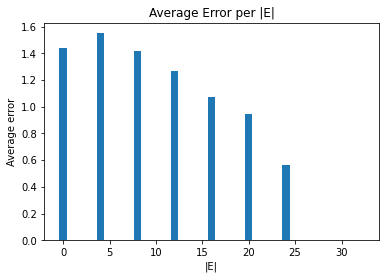

In [99]:
import matplotlib.pyplot as plt

plt.bar(NN_errs_per_E.keys(), NN_avg_err_per_E)
plt.title("Average Error per |E|")
plt.xlabel("|E|")
plt.ylabel("Average error")
plt.show()


In [100]:
print(NN_avg_err_per_E)

[1.4406798052681586, 1.550304966433803, 1.414556176731309, 1.2650878267033552, 1.075568250789764, 0.9418104734176245, 0.5615239143371582, 0.0]


#### This two cell bellow Generate a graph similar to one above
### The goal is to show the effect of lack of exaples on predictive ability

In [101]:
example_per_E = {}
# initate the dict of lists
for i in posbl_abs_E:
    example_per_E[i]=[]

# listing examples per |E|
for i in range(65536):
    Y = np.abs(y[i])
    example_per_E[Y].append(Y)

len_exmps_per_E = []
# exmaples to # per |E|
for i in posbl_abs_E:
    len_exmps_per_E.append(len(example_per_E[i]))

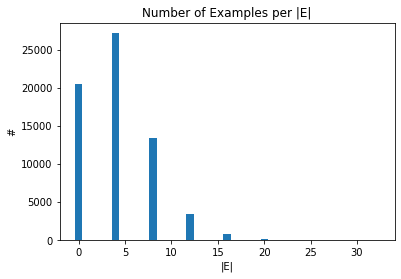

In [102]:
plt.bar(NN_errs_per_E.keys(), len_exmps_per_E)
plt.title("Number of Examples per |E|")
plt.xlabel("|E|")
plt.ylabel("#")
plt.show()

In [103]:
posbl_E = [-32,-24,-20,-16,-12,-8,-4,0,4,8,12,16,20,24,32]
NN_errs_per_E_not_abs = {}

# creates a dictionary with empty list for every |E|
for i in posbl_E:
    NN_errs_per_E_not_abs[i]=[]

# this chooses the closest class of predicted value
# i.e. regression to classification
def closest_abs_E(y_pred):
    acc = 32
    best = 0
    for i in posbl_E:
        err = np.abs(i-y_pred)
        if err <= acc:
            acc = err
            best = i
    return best

# this passes all of the data for testsing 
# for predicted E, append the error to corresponding list
# i.e. outcome is 15 lists with errors for given E 
for i in range(65536):
    y_pred = model(torch.as_tensor(x[i])).item()
    y_pred_class = closest_abs_E(y_pred)
    
    err = y[i]-y_pred, i, x[i], y[i], y_pred
    NN_errs_per_E_not_abs[y[i]].append(err)

# Get the average error for each E
NN_avg_err_per_E_not_abs = []

for i in posbl_abs_E:
    if len(NN_errs_per_E_not_abs[i][0]) != 0:
     NN_avg_err_per_E_not_abs.append(sum(NN_errs_per_E_not_abs[i][0])/len(NN_errs_per_E_not_abs[i][0]))
    

import matplotlib.pyplot as plt

plt.bar(NN_errs_per_E_not_abs.keys(), NN_avg_err_per_E_not_abs)
plt.title("Average Error per |E|")
plt.xlabel("|E|")
plt.ylabel("Average error")
plt.show()

In [104]:
errs_per = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
maX = []
Min =[]
acc = 0
for i in posbl_E:
    for j in NN_errs_per_E_not_abs[i]:
        errs_per[acc].append(j[0])
    acc+=1

for i in errs_per:
    maX.append(max(i))
    Min.append(min(i))

In [105]:
NN_errs_per_E_not_abs[0]


fmax_err_grid = list(range(15))
oacc_indx=0r ini in posbl_E:
 
     acc = 0
       ffor  j in NN_errs_per_E_not_abs[0]:i        jaif acc < j:np.abs(:[0])
            acc = j
 [0]           accmax_err_grid[acc_indx]= jj
     acc_indx +=1 

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 10)

In [200]:
print(max_err_grid)
len(posbl_E)

[(-3.4253158569335938, 42405, [array([ 1., -1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1., -1.,
        1., -1.,  1.], dtype=float32)], -32.0, -28.574684143066406), (-3.8290977478027344, 58789, [array([ 1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1., -1.,
        1., -1.,  1.], dtype=float32)], -24.0, -20.170902252197266), (-1.7861461639404297, 58785, [array([ 1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1., -1.,
       -1., -1.,  1.], dtype=float32)], -20.0, -18.21385383605957), (-2.5309219360351562, 64090, [array([ 1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1., -1.,  1.,  1.,
       -1.,  1., -1.], dtype=float32)], -16.0, -13.469078063964844), (2.4663877487182617, 59989, [array([ 1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.,  1., -1.,  1., -1.,
        1., -1.,  1.], dtype=float32)], -12.0, -14.466387748718262), (4.610955238342285, 36375, [array([ 1., -1., -1., -1.,  1.,  1.,  1., -1., -1., -1., -1.,  1., -1.,
        1.,  1.,  1.], dtype=float32)], -8.0, 

15

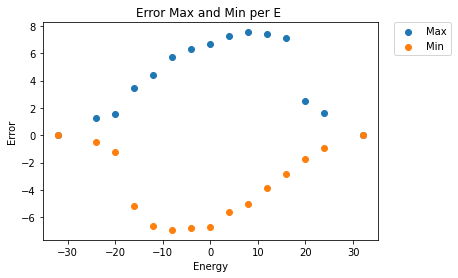

In [107]:
plt.scatter(posbl_E,maX, label="Max")
plt.scatter(posbl_E,Min, label="Min")
plt.title("Error Max and Min per E ")
plt.xlabel("Energy")
plt.ylabel("Error")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [224]:
np.reshape(max_err_grid[1][2],(4,4))

array([[ 1.,  1.,  1., -1.],
       [-1.,  1., -1.,  1.],
       [ 1., -1.,  1., -1.],
       [-1.,  1., -1.,  1.]], dtype=float32)

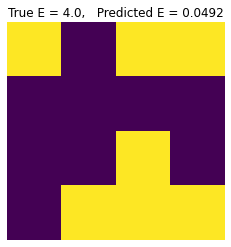

In [247]:
plt.imshow(np.reshape(max_err_grid[8][2],(4,4)))

rounded = int(max_err_grid[8][4] * (10 ** 4)) / (10 ** 4)
f = f"True E = {max_err_grid[8][3]},   Predicted E = {rounded}"
plt.title(f)
plt.axis('off')
plt.show()

In [233]:
ys = []
H = max_err_grid[8][2]

for i in range(100):
    ys.append(model(torch.as_tensor(H)).item())

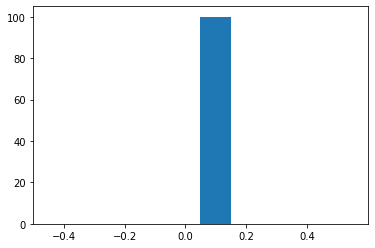

In [235]:
plt.hist(ys)
plt.show()